In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDowker import DowkerComplex
from sklearn.metrics import pairwise_distances
import gudhi as gd
import networkx as nx

Let us consider two small point clouds containing four points each.

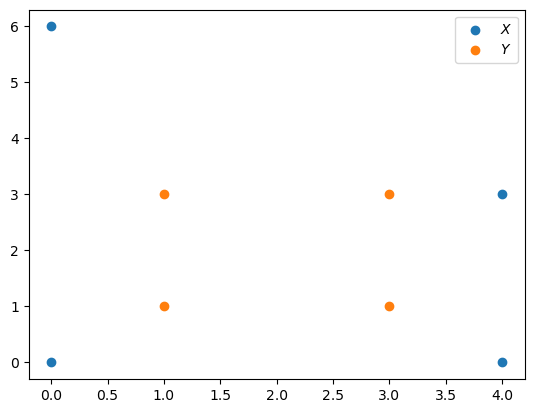

In [2]:
X = np.array([(0,0),(4,0), (0,6),(4,3)])
Y = np.array([(1,3),(3,3), (3,1),(1,1)])
f,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], label='$X$')
ax.scatter(Y[:,0],Y[:,1], label='$Y$')
ax.legend()
plt.show()

For every combination of the two point clouds, we can consider the corresponding Dowker complex.

In [3]:
Dow_XX = DowkerComplex.DowkerComplex(pairwise_distances(X,X))
Dow_XY = DowkerComplex.DowkerComplex(pairwise_distances(X,Y))
Dow_YX = DowkerComplex.DowkerComplex(pairwise_distances(Y,X))
Dow_YY = DowkerComplex.DowkerComplex(pairwise_distances(Y,Y))

complexes = [Dow_XX,Dow_XY,Dow_YX,Dow_YY]
names = ['$H_\\ast(\mathcal{D}(X,X)',
         '$H_\\ast(\mathcal{D}(X,Y)',
         '$H_\\ast(\mathcal{D}(Y,X)',
         '$H_\\ast(\mathcal{D}(Y,Y)']


Let us construct the Dowker complexes and the subcomplexes for fixed total weight and compute the persistent homology with respect to sublevels of the distance matrix.

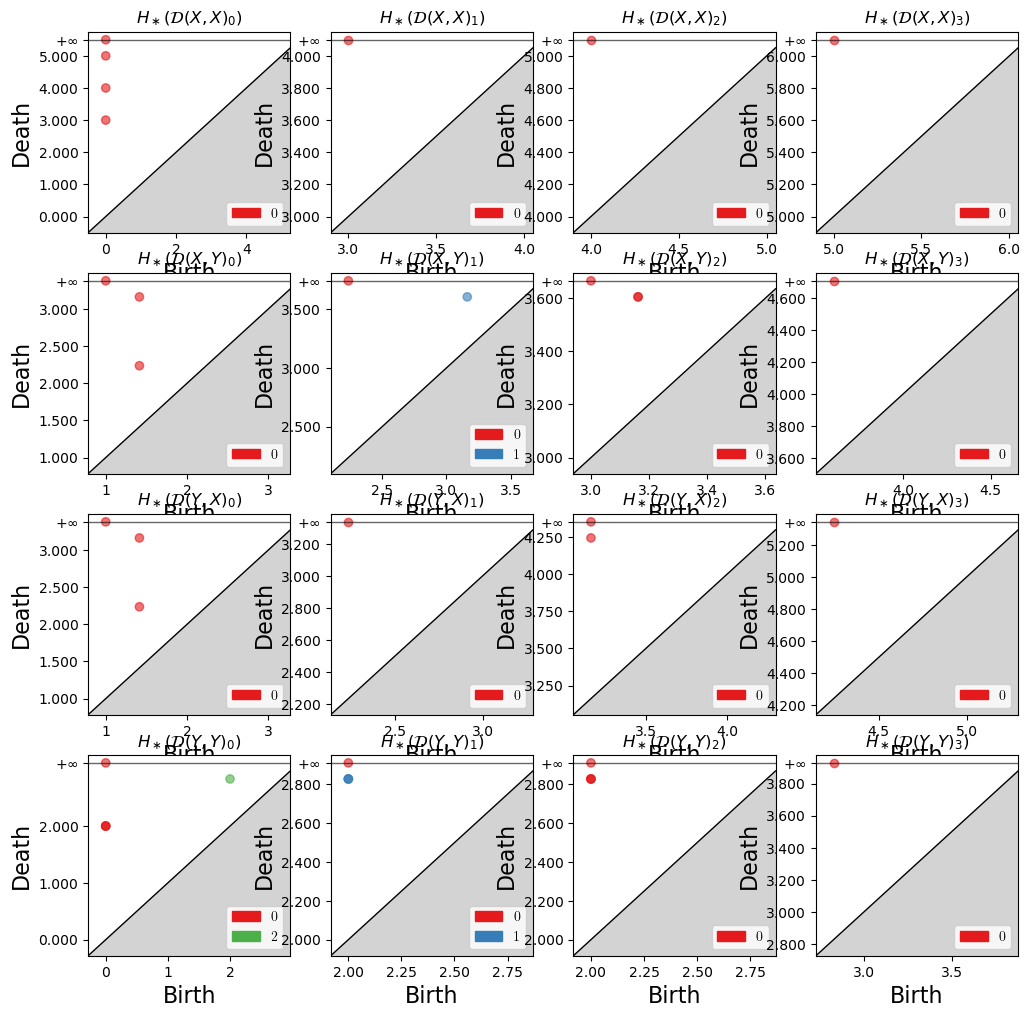

In [4]:
f,ax = plt.subplots(4,4,figsize = (12,12))
for m in range(4):
    Dowker = [C.create_simplex_tree(max_dimension = 4, filtration = "Sublevel", m =m+1) for C in complexes]
    for i in range(4):
        dgm = Dowker[i].persistence()
        gd.plot_persistence_diagram(dgm, axes=ax[i,m])
        ax[i,m].set_title(names[i]+'_{})$'.format(m))
plt.show()

We can also consider the joint information given by the bifiltration, which is computed in the following code:

In [5]:
DowkerBifiltrations = [C.create_rivet_bifiltration(max_dimension = 4, m_max=4) for C in complexes]

As a sanity check, let us compare the bidegrees of appearance with the filtration value in the simplex tree computed previously.

In [6]:
j = 2
for i in range(len(DowkerBifiltrations[j].simplices)):
    s = DowkerBifiltrations[j].simplices[i]
    print(s, ": Bifi Appearances:", DowkerBifiltrations[j].appearances[i], ", ST filtration:",Dowker[j].filtration(s))

[3] : Bifi Appearances: [(1.4142135623730951, 1), (3.1622776601683795, 2), (3.605551275463989, 3), (5.0990195135927845, 4)] , ST filtration: 5.0990195135927845
[2] : Bifi Appearances: [(1.4142135623730951, 1), (2.23606797749979, 2), (3.1622776601683795, 3), (5.830951894845301, 4)] , ST filtration: 5.830951894845301
[2, 3] : Bifi Appearances: [(3.1622776601683795, 1), (3.1622776601683795, 2), (3.605551275463989, 3), (5.830951894845301, 4)] , ST filtration: 5.830951894845301
[1] : Bifi Appearances: [(1.0, 1), (3.1622776601683795, 2), (4.242640687119285, 3), (4.242640687119285, 4)] , ST filtration: 4.242640687119285
[1, 2] : Bifi Appearances: [(2.23606797749979, 1), (3.1622776601683795, 2), (4.242640687119285, 3), (5.830951894845301, 4)] , ST filtration: 5.830951894845301
[1, 2, 3] : Bifi Appearances: [(3.1622776601683795, 1), (3.605551275463989, 2), (4.242640687119285, 3), (5.830951894845301, 4)] , ST filtration: 5.830951894845301
[1, 3] : Bifi Appearances: [(3.1622776601683795, 1), (3.6

Now for something different, we are going to consider the multi-neighborhood filtered complex associated to an Erdös-Renyi graph.

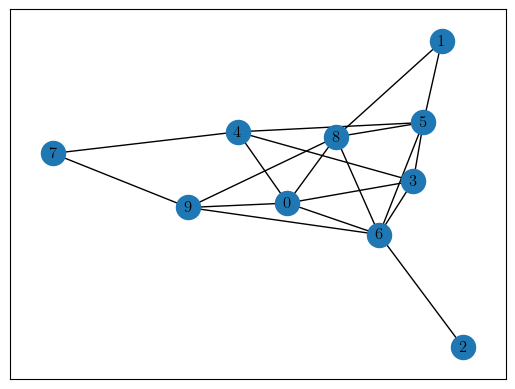

In [10]:
G = nx.erdos_renyi_graph(n=10, p = 0.5, seed=0)
nx.draw_networkx(G)

We first need to convert the adjacency matrix to boolean.

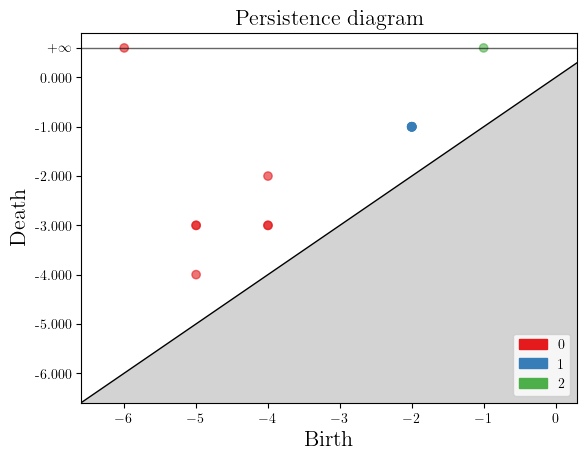

In [11]:
A = np.array(nx.adjacency_matrix(G).toarray(), dtype=bool)
MNeighbor = DowkerComplex.DowkerComplex(A).create_simplex_tree(filtration='TotalWeight', max_dimension=3)
dgms = MNeighbor.persistence()
f,ax = plt.subplots()
gd.plot_persistence_diagram(dgms, axes=ax)
plt.show()